# Practical Homework 1 - Linear Regression

Student Number: 400104715

Student Name: Ali Aghayari

# Phase 0: Intro

For this assignment, you'll be given a dataset containing some features of a group of people. Given those features, you will try to predict how much they tend to spend on the medical services they receive.

In [1]:
# run this cell to download the dataset
!wget -O /kaggle/working/dataset.csv "https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1"

--2023-11-15 14:40:07--  https://www.dropbox.com/scl/fi/sy3nij8fkha309jnfi7c4/dataset.csv?rlkey=cjy9gof3hyqx1wo9ali1pusbv&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e5e908b2506f61e065f0144fb.dl.dropboxusercontent.com/cd/0/inline/CHkEzLJ9bRKTZjgGYq9UcnrV-QHYMFISnYGrHsnwuMS9-5d4oq50tzdcfGOqoMrh_KcXv4vnIfLHNMzjNJKkf9GQZ_SrmI3ML0ZsEw2CqSXZi09G_7HULV49fYHyt00xsF5hWqNyKh8sZwGwBH_oFrxF/file?dl=1# [following]
--2023-11-15 14:40:08--  https://uc8e5e908b2506f61e065f0144fb.dl.dropboxusercontent.com/cd/0/inline/CHkEzLJ9bRKTZjgGYq9UcnrV-QHYMFISnYGrHsnwuMS9-5d4oq50tzdcfGOqoMrh_KcXv4vnIfLHNMzjNJKkf9GQZ_SrmI3ML0ZsEw2CqSXZi09G_7HULV49fYHyt00xsF5hWqNyKh8sZwGwBH_oFrxF/file?dl=1
Resolving uc8e5e908b2506f61e065f0144fb.dl.dropboxusercontent.com (uc8e5e908b2506f61e065f0144fb.dl.dropboxusercontent.com)... 162.12

In [2]:
# libraries that you allowed to use
import os
import pandas
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Phase 1: Explore

## Sec 1: Load and Explore **(P1-Sec1: 15 points)**

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe.

In [3]:
DF = pd.read_csv("../working/dataset.csv")
DF.head()

,age,sex,bmi,children,smk,region,target
0,46,female,19.95,2,no,northwest,9193.83850
1,47,female,24.32,0,no,northeast,8534.67180
2,52,female,24.86,0,no,southeast,27117.99378
3,39,female,34.32,5,no,southeast,8596.82780
4,54,female,21.47,3,no,northwest,12475.35130


Print the names of the columns and the number of rows of the dataset **(P1-1-1: 2 points)**

In [4]:
print("name of the columns :" ,DF.columns.values )
print("number of rows :" ,DF.shape[0])

name of the columns : ['age' 'sex' 'bmi' 'children' 'smk' 'region' 'target']
number of rows : 1070


Get a brief description of the dataset **(P1-1-2: 2 points)**

In [5]:
print("description of the non numerical columns :")
print(DF.describe(include=['O']))
print("\n\ndescription of the numerical columns :")
DF.describe()

description of the non numerical columns :
         sex   smk     region
count   1070  1070       1070
unique     2     2          4
top     male    no  southeast
freq     548   850        283


description of the numerical columns :


,age,bmi,children,target
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


Check for missing values in the dataset **(P1-1-3: 2 points)**

In [6]:
DF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smk         0
region      0
target      0
dtype: int64

Use Histograms and Box-plots to visualize the distribution of numerical columns **(P1-1-4: 2 points)**

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

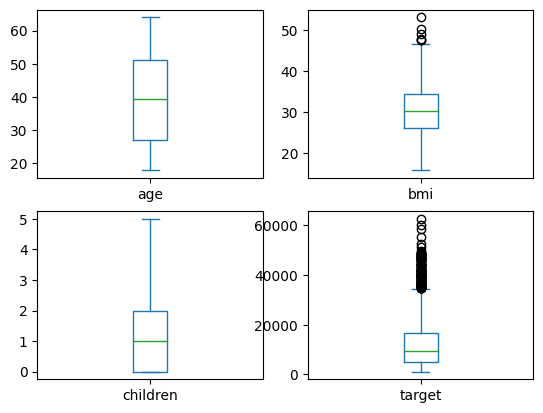

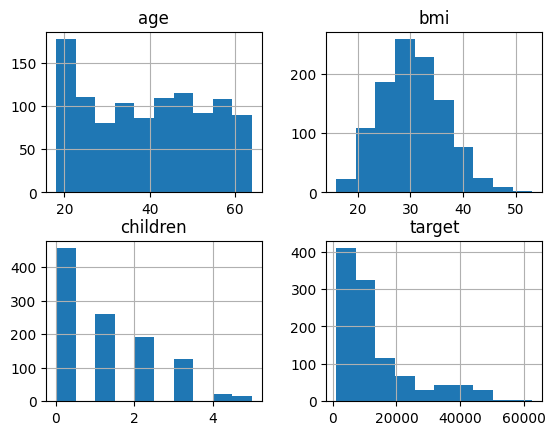

In [7]:
DF.plot.box(subplots=True, layout=(2,2))
DF.hist()

Count the number of unique values for each class in categorical columns and compare the distributions amongst them **(P1-1-5: 5 points)**

In [8]:
for col in DF.select_dtypes(exclude = ['int64', 'float64']).columns:
    print(DF[col].value_counts())
    print("number of unique values :",DF[col].nunique(),end="\n\n")

sex
male      548
female    522
Name: count, dtype: int64
number of unique values : 2

smk
no     850
yes    220
Name: count, dtype: int64
number of unique values : 2

region
southeast    283
northeast    267
southwest    264
northwest    256
Name: count, dtype: int64
number of unique values : 4



Convert columns with string values (`sex`, `smk`, and `region`) into numerical values **(P1-1-6: 2 points)**

In [9]:
category_mapping = [] 
for col in ["sex" ,"smk" ,"region"]:
    cats = {k:v for v,k in enumerate(np.unique(DF[col].values))}
    category_mapping.append(cats)
    print(cats)
    DF[col] = DF[col].replace(cats)
    #DF[col] = pd.Categorical(DF[col], categories=DF[col].unique()).codes

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


## Sec 2: Check for linear relation **(P1-Sec2: 10 points)**

Plot `age` and `smk` against `target` **(P1-2-1: 5 points)**

<Axes: xlabel='smk'>

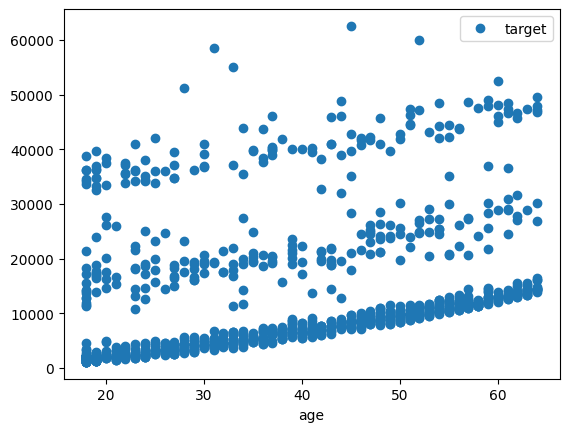

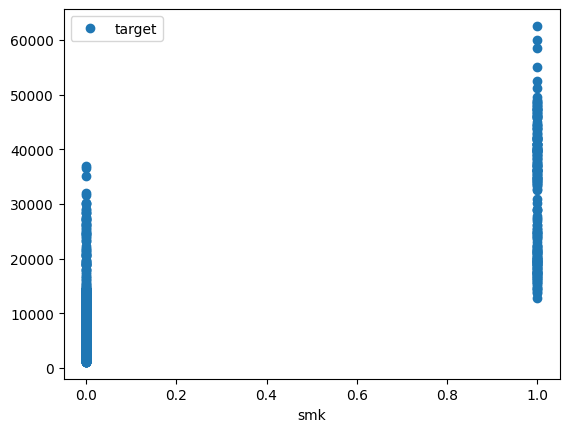

In [10]:
DF.plot(x='age', y='target', style='o')
DF.plot(x='smk', y='target', style='o')

Plot the correlation matrix for numerical features **(P1-2-2: 5 points)**

               age       bmi  children    target
age       1.000000  0.118274  0.060999  0.281721
bmi       0.118274  1.000000 -0.005040  0.197316
children  0.060999 -0.005040  1.000000  0.071885
target    0.281721  0.197316  0.071885  1.000000


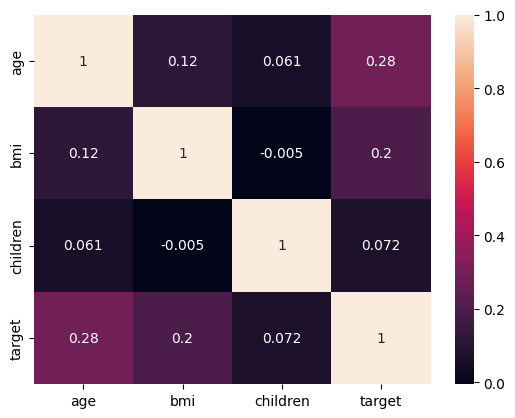

In [11]:
# corr_matrix = DF.corr()
corr_matrix = DF.loc[: ,["age" ,"bmi" ,"children" ,"target"]].corr()  # since its said to plot it for the -numerical- values 
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables **(P2-Sec1: 15 points)**

Using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)
<br>
One-hot encoding is a method for converting categorical data to numerical ones that can be fed into a model. This method works by creating a binary vector for each category. **(P2-1-1: 5 points)**

In [12]:
print(category_mapping[-1])
DF = pd.get_dummies(DF, columns = ["region"] ,dtype='int')
DF.head()

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


,age,sex,bmi,children,smk,target,region_0,region_1,region_2,region_3
0,46,0,19.95,2,0,9193.83850,0,1,0,0
1,47,0,24.32,0,0,8534.67180,1,0,0,0
2,52,0,24.86,0,0,27117.99378,0,0,1,0
3,39,0,34.32,5,0,8596.82780,0,0,1,0
4,54,0,21.47,3,0,12475.35130,0,1,0,0


Do the same thing for the `smoker` and `sex` variable (the result should be a dataframe) **(P2-1-1: 10 points)**

In [13]:
print(category_mapping[0])
print(category_mapping[1])
DF = pd.get_dummies(DF, columns = ["sex" ,"smk"] ,dtype='int') 
DF.head()

{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}


,age,bmi,children,target,region_0,region_1,region_2,region_3,sex_0,sex_1,smk_0,smk_1
0,46,19.95,2,9193.83850,0,1,0,0,1,0,1,0
1,47,24.32,0,8534.67180,1,0,0,0,1,0,1,0
2,52,24.86,0,27117.99378,0,0,1,0,1,0,1,0
3,39,34.32,5,8596.82780,0,0,1,0,1,0,1,0
4,54,21.47,3,12475.35130,0,1,0,0,1,0,1,0


## Sec 2: Normalization **(P2-Sec2: 10 points)**

Normalize the columns `age`, `bmi`, and `children`. After this process, they should take values between 0 and 1. **(P2-2: 10 points)**

In [14]:
# using min - max feature scaling
for col in ["age" ,"bmi" ,"children"]:
    DF[col] = (DF[col] - DF[col].min()) / (DF[col].max() - DF[col].min())     
DF.head()

,age,bmi,children,target,region_0,region_1,region_2,region_3,sex_0,sex_1,smk_0,smk_1
0,0.608696,0.107345,0.4,9193.83850,0,1,0,0,1,0,1,0
1,0.630435,0.224913,0.0,8534.67180,1,0,0,0,1,0,1,0
2,0.739130,0.239440,0.0,27117.99378,0,0,1,0,1,0,1,0
3,0.456522,0.493947,1.0,8596.82780,0,0,1,0,1,0,1,0
4,0.782609,0.148238,0.6,12475.35130,0,1,0,0,1,0,1,0


# Phase 3: Training

## Sec 1: Preparing features and Targets **(P3-Sec1: 5 points)**

Extract only the features from the dataframe by removing the `target` column. <br>
Note: Do not remove the previous dataframe.

In [15]:
DF_features = DF.drop("target" ,axis=1) 
DF_features.head()

,age,bmi,children,region_0,region_1,region_2,region_3,sex_0,sex_1,smk_0,smk_1
0,0.608696,0.107345,0.4,0,1,0,0,1,0,1,0
1,0.630435,0.224913,0.0,1,0,0,0,1,0,1,0
2,0.739130,0.239440,0.0,0,0,1,0,1,0,1,0
3,0.456522,0.493947,1.0,0,0,1,0,1,0,1,0
4,0.782609,0.148238,0.6,0,1,0,0,1,0,1,0


Convert the new dataframe into a numpy array **(P3-1-1: 3 points)**

In [16]:
features = DF_features.to_numpy()
features[0]

array([0.60869565, 0.10734463, 0.4       , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        ])

Get the `target` column from the previous dataframe and convert it to another numpy array named `y` **(P3-1-2: 2 points)**

In [17]:
y = DF["target"].to_numpy()
y

array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
       46113.511  , 10214.636  ])

## Sec 2: Splitting the Data **(P3-Sec2: 5 points)**

Split the dataset into two parts such that the training set (denoted as `x_train` and ‍`y_train`), contains 80% of the samples. **(P3-2: 5 points)**

In [18]:
# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(features, y, test_size=0.2, random_state=0)

# train = DF.sample(frac=0.8)

train = DF.sample(frac=0.8 ,random_state=200)
test = DF.drop(train.index)
save_test = test.copy()


x_train = train.drop("target" ,axis=1).to_numpy()
y_train = train["target"].to_numpy()

x_test = test.drop("target" ,axis=1).to_numpy()
y_test = test["target"].to_numpy()

## Sec 3: Linear Regression from Scratch **(P3-Sec3: 10 points)**

Complete this section with your code. **(P3-3: 10 points)**

In [19]:
class MyLinearRegression:
    coefficeints = None
    intercept = None
    myArray = None
    def __init__(self):
        pass

    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values

        No Returns
        """
        X_ = np.hstack((np.ones((X.shape[0] ,1)) , X))
        self.myArray = np.linalg.lstsq(X_, y ,rcond=None)[0]
        self.coefficeints = self.myArray[1:]
        self.intercept = self.myArray[0]

    def predict(self, X):
        """ Predicts the values after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted values
        """
        X_ = np.hstack((np.ones((X.shape[0] ,1)) , X))
        return X_.dot(self.myArray)

## Sec 4: Fit the model to training data **(P3-Sec4: 10 points)**

Fit a linear regressor to the data. (Use both regressors - sklearn & from scratch) **(P3-4-1: 2 points)**

In [20]:
# its said that we can use regressors of sklearn
from sklearn.linear_model import LinearRegression

sklearnLR = LinearRegression()
sklearnLR.fit(x_train ,y_train)

myLR = MyLinearRegression()
myLR.fit(x_train ,y_train)


Get the coefficients of the variables (sklearn) **(P3-4-2: 3 points)**

In [21]:
print(myLR.intercept ,myLR.coefficeints)
print(sklearnLR.intercept_ ,sklearnLR.coef_)

4125.211066330159 [11616.26813481 12784.45518247  2481.13508665  1647.7027511
  1148.86357614   799.30088076   529.34385834  2039.56076368
  2085.65030265 -9826.56678131 13951.77784765]
9281.724899242907 [ 11616.26813481  12784.45518247   2481.13508665    616.39998452
    117.56080955   -232.00188583   -501.95890825    -23.04476949
     23.04476949 -11889.17231448  11889.17231448]


Get the score value of sklearn regressor on train dataset (sklearn) **(P3-4-3: 5 points)**

In [22]:
print(sklearnLR.score(x_train, y_train))

# or we could : 
# from sklearn.metrics import r2_score
# y_pred = sklearnLR.predict(x_train)
# y_true = y_train
# print(r2_score(y_true, y_pred))


0.7463601501555067


# Phase 4: Evaluation

## Sec 1: Evaluate both models and compare the results **(P4-Sec1: 20 points)**

Predict the value of "y" for each "x" belonging to the "testing" set (use both regressors) **(P4-1-1: 10 points)**

In [23]:
y_pred_sklearn = sklearnLR.predict(x_test)
y_true_sklearn = y_test

y_pred_custom = myLR.predict(x_test)
y_true_custom = y_test

Compute the mean squared error **(P4-1-2: 5 points)**

In [24]:
def MSE(y_true ,y_pred):
    return (np.square(np.subtract(y_true,y_pred))).mean() 

print("sklearn")
print(MSE(y_true_sklearn, y_pred_sklearn))

print("custom")
print(MSE(y_true_custom, y_pred_custom))

sklearn
42903058.85587242
custom
42903058.85587249


Calculate the maximum error for each regressor **(P4-1-3: 5 points)**

In [25]:
def ME(y_true ,y_pred):
    return np.max(np.abs(np.subtract(y_true,y_pred))) 

print("sklearn")
print(ME(y_true_sklearn, y_pred_sklearn))

print("custom")
print(ME(y_true_custom, y_pred_custom))

sklearn
23935.491441857965
custom
23935.49144185803


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: WILL BE ADDED IN THE NEXT FEW DAYS<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>